# Multi-Layer Perceptron

In [34]:
from dataset_loader import load_dataset

path = "loan_data.csv"
dataset = load_dataset(path)
data = dataset.drop("loan_status", axis=1)
targets = dataset["loan_status"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_labels, test_labels = train_test_split(data, targets, train_size=0.8, random_state=1)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Building the model

model = Sequential([
    # Input layer
    Input(shape=(train_data_scaled.shape[1],)),

    # Hidden layers
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation="sigmoid")
])


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,001 (187.50 KB)

 Trainable params: 47,041 (183.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Training the model

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model.fit(train_data_scaled, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/50
788/788 - 5s - 7ms/step - accuracy: 0.8381 - loss: 0.6496 - val_accuracy: 0.8978 - val_loss: 0.4826
Epoch 2/50
788/788 - 2s - 3ms/step - accuracy: 0.8799 - loss: 0.4751 - val_accuracy: 0.8979 - val_loss: 0.3879
Epoch 3/50
788/788 - 2s - 3ms/step - accuracy: 0.8859 - loss: 0.3889 - val_accuracy: 0.9035 - val_loss: 0.3190
Epoch 4/50
788/788 - 2s - 3ms/step - accuracy: 0.8857 - loss: 0.3339 - val_accuracy: 0.8992 - val_loss: 0.2837
Epoch 5/50
788/788 - 2s - 3ms/step - accuracy: 0.8898 - loss: 0.3021 - val_accuracy: 0.9006 - val_loss: 0.2637
Epoch 6/50
788/788 - 2s - 3ms/step - accuracy: 0.8904 - loss: 0.2847 - val_accuracy: 0.9051 - val_loss: 0.2471
Epoch 7/50
788/788 - 2s - 3ms/step - accuracy: 0.8911 - loss: 0.2786 - val_accuracy: 0.9054 - val_loss: 0.2449
Epoch 8/50
788/788 - 2s - 3ms/step - accuracy: 0.8940 - loss: 0.2709 - val_accuracy: 0.9035 - val_loss: 0.2417
Epoch 9/50
788/788 - 2s - 3ms/step - accuracy: 0.8922 - loss: 0.2692 - val_accuracy: 0.9073 - val_loss: 0.2399
E

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(test_data_scaled)
y_pred = (pred > 0.5).astype(int)

report = classification_report(test_labels, y_pred)
print(report)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10492
           1       0.84      0.70      0.76      3006

    accuracy                           0.90     13498
   macro avg       0.88      0.83      0.85     13498
weighted avg       0.90      0.90      0.90     13498



Text(95.72222222222221, 0.5, 'True Label')

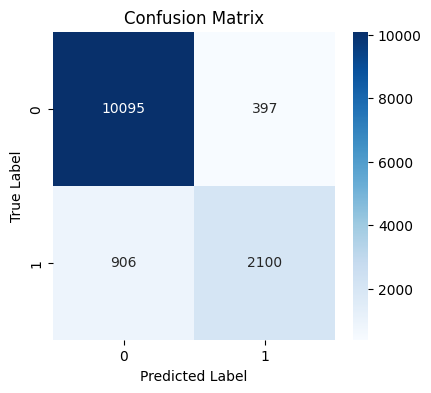

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')